# **Item 1**

Para o Item 1, precisamos resolver o seguinte sistema de equações não lineares:
$$
  \begin{align}
    x_1 x_2 + x_1 &- 3 x_5 = 0, \nonumber \\
    2x_1 x_2 + x_1 + 3 R_{10} x_2^2 + x_2 x_3^2 + & R_7 x_2 x_3 + R_9 x_2 x_4 + R_8 x_2 - R x_5 = 0, \nonumber \\
    2 x_2 x_3^2 + R_7 x_2 x_3 + & 2 R_5 x_3^2 + R_6 x_3 - 8x_5 = 0, \nonumber \\
    R_9 x_2 x_4 + & 2 x_4^2 - 4 R x_5 = 0, \nonumber \\
    x_1 x_2 + x_1 + R_{10} x_2^2 + x_2 x_3^2 + R_7 x_2 x_3 & + R_9 x_2 x_4 + R_8 x_2 + R_5 x_3^2 + R_6 x_3 + x_4^2 - 1 = 0
  \end{align}
$$
onde $0.0001 \leq x_i \leq 100$, $i=1,2,...,5$, $R = 10$, $R_5 = 0.193$, $R_6 = 4.10622 \times 10^{-4}$, $R_7 = 5.45177 \times 10^{-4}$, $R_8 = 4.4975 \times 10^{-7}$, $R_9 = 3.40735 \times 10^{-5}$ e $R_{10} = 9.615 \times 10^{-7}$.

In [12]:
R, R5, R6, R7, R8, R9, R10 = [10.0, 0.193, 4.10622e-4, 5.45177e-4, 4.4975e-7, 3.40735e-5, 9.615e-7]

f1 = lambda x1, x2, x3, x4, x5: x1*x2+x1-3*x5
f2 = lambda x1, x2, x3, x4, x5: 2*x1*x2+x1+3*R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2-R*x5
f3 = lambda x1, x2, x3, x4, x5: 2*x2*x3**2 + R7*x2*x3+2*R5*x3**2+R6*x3-8*x5
f4 = lambda x1, x2, x3, x4, x5: R9*x2*x4+2*x4**2 - 4*R*x5
f5 = lambda x1, x2, x3, x4, x5: x1*x2+x1+R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2+R5*x3**2+R6*x3+x4**2-1
F = [f1,f2,f3,f4,f5]

Também usaremos a forma analítica da matriz Jacobiana, que pode ser obtida facilmente nesse caso:
$$
  \bm J(\vec x) = 
  \begin{bmatrix}
    x_2 + 1 & x_1 & 0 & 0 & -3 \\
    2x_2 + 1 & 2x_1 + 6 R_{10} x_2 + x_3^2 + R_7 x_3 + R_9 x_4 + R_8 & 2 x_2 x_3 + R_7 x_2 & R_9 x_2 & -R \\
    0 & 2x_3^2 + R_7 x_3 & 4 x_2 x_3 + R_7 x_2 + 4 R_5 x_3 + R_6 & 0 & -8 \\
    0 & R_9 x_4 & 0 & R_9 x_2 + 4 x_4 & - 4 R \\
    x_2 + 1 & x_1 + 2 R_{10} x_2 + x_3^2 + R_7 x_3 + R_9 x_4 + R_8 & 2 x_2 x_3 + R_7 x_2 + 2 R_5 x_3 + R_6 & R_9 x_2 + 2 x_4 & 0
  \end{bmatrix}
$$

In [13]:
Jac = [
  [
    lambda x1, x2, x3, x4, x5: x2 + 1,
    lambda x1, x2, x3, x4, x5: x1,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -3
  ],
  [
    lambda x1, x2, x3, x4, x5: 2*x2+1,
    lambda x1, x2, x3, x4, x5: 2*x1+6*R10*x2+x3**2+R7*x3+R9*x4+R8,
    lambda x1, x2, x3, x4, x5: 2*x2*x3 + R7*x2,
    lambda x1, x2, x3, x4, x5: R9*x3,
    lambda x1, x2, x3, x4, x5: -R
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 2*x3**2+R7*x3,
    lambda x1, x2, x3, x4, x5: 4*x2*x3 + R7*x2 + 4*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -8
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x4,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x2 + 4*x4,
    lambda x1, x2, x3, x4, x5: -4*R
  ],
  [
    lambda x1, x2, x3, x4, x5: x2+1,
    lambda x1, x2, x3, x4, x5: x1 + 2*R10*x2 + x3**2 + R7 * x3 + R9*x4 + R8,
    lambda x1, x2, x3, x4, x5: 2*x3*x3 + R7*x2 + 2*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: R9*x2 + 2*x4,
    lambda x1, x2, x3, x4, x5: 0
  ]
]

Além disso, partiremos sempre do ponto inicial $\vec x_0 = (10,10,10,10,10)$

In [14]:
x0 = [10,10,10,10,10]

## **a) Método de Newton**

**Partindo da condição inicial $\vec x_0 = (10,10,10,10,10)$ encontre a solução para o problema usando o Método de Newton. Para cada iteração apresente a solução estimada e a norma do resíduo do lado direito da equação. Atribua um critério de convergência e mça o tempo necessário para alcançar a convergência.**

Utilizaremos então o Método de Newton com a matriz Jacobiana do sistema em sua forma analítica. O critério de convergência admitido é o de limitação computacional, medido pela norma infinito do vetor $\vec y$ tal que $\bm J(\vec x^{(i)}) \vec y = - \bm F(\vec x^{(i)})$ e $\vec x^{(i+1)} = \vec x^{(i)} + \vec y$. O número máximo de passos admitido é 500. O solucionador de sistemas lineares é o ```numpy.linalg.solve```. Além disso, como sabemos a solução real, podemos usá-la para comparar com o obtido.

In [15]:
from metodo_newton import Newton # classe com o Método de Newton
from numpy.linalg import solve # método do NumPy para resolver sistemas de equações lineares

newton = Newton(F, solve)

limitacao_float = True
qntd_maxima_passos = 500

sol = [0.003431, 31.325636, 0.068352, 0.859530, 0.036963]

x_newton, info_newton = newton.aplicar(p0=x0,Jac=Jac,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, limitacao_float=limitacao_float, solucao_exata=sol)
from auxiliares.exibir import exibir_vetores

tabela = exibir_vetores(info_newton)

Causa da parada: limitação de ponto flutuante (res.)
   i |          x1 |       x2 |        x3 |        x4 |          x5 |    diferença |         erro |       resíduo
-----+-------------+----------+-----------+-----------+-------------+--------------+--------------+---------------
   1 |  0.010652   |  9.99922 | 5.00103   |  5.03642  |  0.0364587  |  9.98935     | 21.3264      | 509.558
   2 | -0.990133   |  7.31845 | 3.01534   | -4.70855  | -3.63975    |  9.74497     | 24.0072      | 189.93
   3 | -0.701553   |  3.94569 | 2.11111   | -0.587007 | -0.832119   |  4.12155     | 27.3799      |  43.5531
   4 | -0.33915    |  2.18033 | 1.47227   |  2.19857  | -0.146278   |  2.78557     | 29.1453      |  15.5187
   5 | -0.0414044  |  1.91732 | 0.809532  |  1.03487  | -0.01416    |  1.1637      | 29.4083      |   2.88042
   6 |  0.0112919  |  2.14866 | 0.369417  |  0.592678 |  0.00778781 |  0.442193    | 29.177       |   0.577409
   7 |  0.0149128  |  4.11709 | 0.0826056 |  0.685398 |  0.02306

Assim, foram necessários 31 passos para haver convergência de ponto flutuante.

Quanto ao tempo, é importante aplicar o método consecutivas vezes para obter valores mais precisos de tempo. O método será aplicado 1000 vezes.

In [16]:
qntd_vezes = 1000
params = [x0, Jac, 0, qntd_maxima_passos, [], -1, True, True, False]
etapas = ['Jacobiana', '$F(x_0)$', '$y$', '$p$']
newton.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 10.7492s
> TEMPO TOTAL MÉDIO: 0.000336s
> QNTD MÉDIA DE PASSOS: 32.0
> PERCENTUAIS
* jacobiana: 56.03%
* Fx0: 23.11%
* y: 10.36%
* p: 10.49%


Podemos ver também que o erro, conforme esperado, segue uma convergência quadrática.

In [17]:
erros = info_newton["erro real"]
for i in range(1, info_newton["passo"], 5):
  print(i, erros[i]/(erros[i-1]**2))

1 0.05278439203143601
6 0.03196133861394276
11 0.005965974444845107
16 1115.7842482691774
21 1161.7017318233538
26 1161.702115772518
31 1161.702115796491


E assim, nesse caso, $M \approx 1161.702$.

## **b) Método de Broyden**

**Repita o problema usando o Método de Broyden.**

Partindo do mesmo ponto, podemos aplicar o Método de Broyden. Considerando 1000 passos, conseguimos convergência no passo 546:

In [115]:
from metodo_broyden import Broyden # classe com o Método de Broyden

broyden = Broyden(F)

limitacao_float = True
qntd_maxima_passos = 3000

x_broyden, info_broyden = broyden.aplicar(p0=x0,Jac=Jac,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, limitacao_float=limitacao_float, solucao_exata=sol)
print('Menor diferença: ', min(info_broyden['erro']))
print('Quantidade de passos: ', info_broyden["passo"])

Causa da parada: limitação de ponto flutuante (res.)
Menor diferença:  1.6835786750834827e-15
Quantidade de passos:  546


Observe que a convergência superlinear não ocorre.

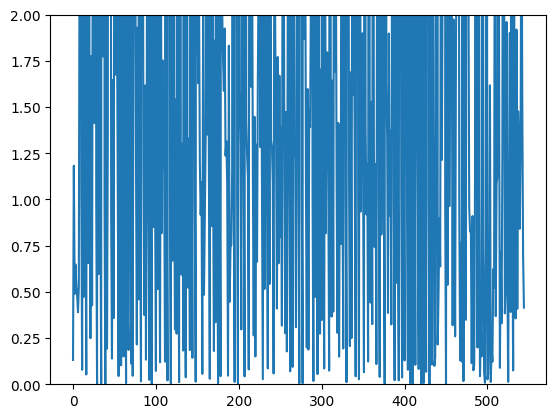

In [116]:
from math import log as ln
erros = info_broyden["erro"]
razao = []
for i in range(1, len(erros)):
  razao.append(erros[i]/erros[i-1])
import matplotlib.pyplot as plt
plt.plot(razao)
plt.ylim([0,2])
plt.show()

No entanto, há de observar também que em várias vezes a solução aproximada foge do domínio considerado:

In [117]:
erros_passo = []
for j, passo in enumerate(info_broyden["x"]):
  for i in range(5):
    if passo[i,0] < 0.0001 or passo[i,0] > 100:
      erros_passo.append(j)
      break
print(erros_passo)

[10, 15, 21, 22, 25, 27, 29, 30, 31, 33, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 85, 91, 98, 100, 101, 104, 108, 115, 117, 123, 124, 131, 132, 139, 140, 145, 150, 152, 154, 155, 156, 157, 158, 159, 162, 168, 170, 171, 177, 180, 182, 184, 196, 198, 202, 205, 206, 210, 211, 212, 215, 217, 224, 226, 233, 235, 236, 239, 245, 249, 253, 255, 261, 264, 268, 271, 272, 273, 274, 279, 281, 287, 289, 294, 297, 303, 304, 307, 308, 312, 313, 316, 318, 325, 328, 329, 330, 333, 338, 343, 345, 346, 349, 350, 354, 355, 359, 360, 363, 368, 370, 371, 374, 375, 376, 377, 381, 385, 387, 393, 394, 399, 402, 403, 414, 419, 427, 449]


No entanto, selecionando os passos finais, antes da convergência, é possível observar o comportamento de convergência superlinear:

1 1.302660507574498
2 2.8843142282898175
3 1.5482773502274394
4 0.6960458408541221
5 0.4149946199721545


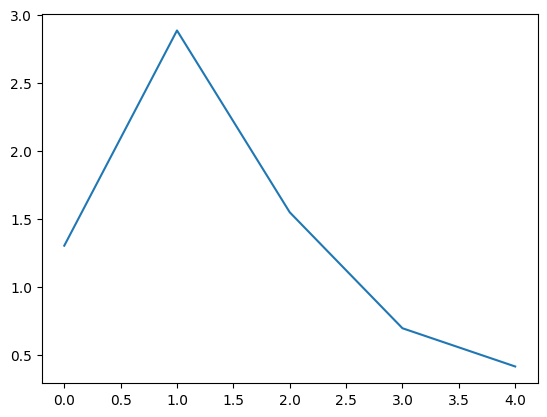

In [118]:
erros = info_broyden["erro"][540:]
razao = []
for i in range(1, len(erros)):
  print(i, erros[i]/(erros[i-1]))
  razao.append(erros[i]*(1/erros[i-1]))

plt.plot(razao)
plt.show()

A convergência para o 1 pode parecer inesperada, mas é apenas consequência das limitações de precisão de ponto flutuante. Observe que imediatamente após haver uma queda significativa, há uma subida no erro que imediatamente leva a 1. Isso significa que o erro ficou tão pequeno que o computador não consegue obter um erro menor, então há convergência. Essa, inclusive, é uma consequência esperada do modo de encerramento do método: a convergência por ponto flutuante.

Dessa forma, podemos observar a não convergência anterior também pela falta de convergência do erro para 1.

Observemos a questão do tempo:

In [126]:
qntd_vezes = 100
params = [x0, Jac, 0, qntd_maxima_passos, [], -1, True, True, False]
broyden.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 6.3984s
> TEMPO TOTAL MÉDIO: 0.000117s
> QNTD MÉDIA DE PASSOS: 546.0
> PERCENTUAIS
* y: 18.22%
* p1: 5.56%
* A_inv: 46.67%
* z: 16.11%
* p: 11.76%
* s1t: 1.67%


O que é menor que o tempo demandado pelo Método de Newton, sendo então mais rápido que o de Newton como esperado, e sendo também menos preciso, conforme a teoria.